* This is my practice version based on a mix of my enrolled bootcamp programs.
* LinkedIn: https://www.linkedin.com/in/binh-nguyen-797319248/
* Email: binhnguyen.ibm@gmail.com

* In notebook `Noah_DS_7_Pandas-p5.ipynb` we encountered MultiIndex when trying to do `groupby` with multiple column.
* In this notebook, we will discovery approaches to work directly with MultiIndex as there are cases we want to apply this structure.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Dataset used in this notebook

titanic = pd.read_csv('data/titanic.csv')
titanic = titanic[['pclass', 'survived', 'sex', 'age', 'sibsp', 'fare']]
titanic['age'] = titanic['age'].replace(['?'], [None]).astype('float')
titanic['fare'] = titanic['fare'].replace(['?'], [None]).astype('float')
# ==============================================================================
population = pd.read_csv('data/state_pops.csv')
# ==============================================================================
sales = pd.read_csv('data/salesmen.csv')
# ==============================================================================
quarters = pd.read_csv('data/quarters.csv')
# ==============================================================================
foods = pd.read_csv('data/foods.csv')

In [5]:
titanic

,pclass,survived,sex,age,sibsp,fare
0,1,1,female,29.0000,0,211.3375
1,1,1,male,0.9167,1,151.5500
2,1,0,female,2.0000,1,151.5500
3,1,0,male,30.0000,1,151.5500
4,1,0,female,25.0000,1,151.5500
...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,14.4542
1305,3,0,female,NaN,1,14.4542
1306,3,0,male,26.5000,0,7.2250
1307,3,0,male,27.0000,0,7.2250


In [6]:
population

,state,year,population
0,AL,2012,4817528.0
1,AL,2010,4785570.0
2,AL,2011,4801627.0
3,AL,2009,4757938.0
4,AL,2013,4833722.0
...,...,...,...
1267,USA,2013,316128839.0
1268,USA,2009,306771529.0
1269,USA,2010,309326295.0
1270,USA,2011,311582564.0


## **11. Hierarchical indexing (Multi-Index)**

### 11.1. Format

In [9]:
titanic_gb_sex_pclass = titanic.groupby(['pclass','sex'])

In [10]:
titanic_gb_sex_pclass.mean()

survived        age     sibsp        fare
pclass sex                                              
1      female  0.965278  37.037594  0.555556  109.412385
       male    0.340782  41.029250  0.340782   69.888385
2      female  0.886792  27.499191  0.500000   23.234827
       male    0.146199  30.815401  0.327485   19.904946
3      female  0.490741  22.185307  0.791667   15.324250
       male    0.152130  25.962273  0.470588   12.415462

In [11]:
titanic_gb_sex_pclass.mean().index # let's check the index structure

MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['pclass', 'sex'])

* The MultiIndex is stored as the tuple-liked structure.
* When group by multiple columns, the orders of column names in the argument list is important.

In [13]:
# For example, we switch the order to ['sex', 'pclass']

titanic.groupby(['sex', 'pclass']).mean()

survived        age     sibsp        fare
sex    pclass                                           
female 1       0.965278  37.037594  0.555556  109.412385
       2       0.886792  27.499191  0.500000   23.234827
       3       0.490741  22.185307  0.791667   15.324250
male   1       0.340782  41.029250  0.340782   69.888385
       2       0.146199  30.815401  0.327485   19.904946
       3       0.152130  25.962273  0.470588   12.415462

In [14]:
titanic.groupby(['sex', 'pclass']).mean().index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

### 11.2. Creating MultiIndex using `.set_index`

In [16]:
# To create a MultiIndex, we put in a list structure as an argument when calling .set_index
# Note that order matters

population.set_index(['state', 'year'])

population
state year             
AL    2012    4817528.0
      2010    4785570.0
      2011    4801627.0
      2009    4757938.0
      2013    4833722.0
...                 ...
USA   2013  316128839.0
      2009  306771529.0
      2010  309326295.0
      2011  311582564.0
      2012  313873685.0

[1272 rows x 1 columns]

In [17]:
# Compared to

population.set_index(['year', 'state'])

population
year state             
2012 AL       4817528.0
2010 AL       4785570.0
2011 AL       4801627.0
2009 AL       4757938.0
2013 AL       4833722.0
...                 ...
     USA    316128839.0
2009 USA    306771529.0
2010 USA    309326295.0
2011 USA    311582564.0
2012 USA    313873685.0

[1272 rows x 1 columns]

### 11.3. Sorting MultiIndex

* Previously, we have `.sort_index()`.
* This method is also applicable on MultiIndex. Also, we can modify the specific levels of index by the parameters:
1. `level = ` to select the level to be applied. e.g. `level = 0`, `level = [0, 1]`... If we don't specify anything, then `.sort_index()` will be applied on all level by default.
2. `ascending =`. If we specify a single Boolean value `True`/`False` then it will be applied on all the targeted levels. If we want to use different arguments on different level, then we specify a list, e.g. `ascending = [False, True]`.

In [20]:
population.set_index(['state', 'year'], inplace = True)

In [21]:
population.sort_index() # let's see the default behavior

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [22]:
# Suppose we only want to sort by year

population.sort_index(level = 'year')

,,population
state,year,
AK,1990,553290.0
AL,1990,4050055.0
AR,1990,2356586.0
AZ,1990,3684097.0
CA,1990,29959515.0
...,...,...
VT,2013,626630.0
WA,2013,6971406.0
WI,2013,5742713.0


In [23]:
# Suppose that we want 'state' to be sorted by ascending, while 'year' sorted by descending order

population.sort_index(ascending = [True, False])

population
state year            
AK    2013    735132.0
      2012    730307.0
      2011    723375.0
      2010    713868.0
      2009    698895.0
...                ...
WY    1994    480283.0
      1993    473081.0
      1992    466251.0
      1991    459260.0
      1990    453690.0

[1272 rows x 1 columns]

### 11.4. `.loc` on MultiIndex

* If we use `.loc` as for the basic cases, then it it applicable only on the outermost index level. For example if the MultiIndex is (state, year) then we can use, says, `.loc['AK']`, but cannot `.loc[1997]`.
* Calling `.loc['AK']` will provide a sub DF containing rows with state = 'AK'.
* In order to apply `.loc` on the inner level, we need to input the tuple-liked structure as the argument because this is the formar of MultiIndex. E.g. `.loc[('AK', 1997)]` which provide data corresponding to state = 'AK' and year = 1997.
* We can still do slicing. See examples below.
* It is tricky when we want use `.loc` based on the inner levels. See example #3 below.

In [26]:
population.sort_index(inplace = True)

In [27]:
# Example 1

population.loc[('WY', 2010)] 

population    564222.0
Name: (WY, 2010), dtype: float64

In [28]:
# Example 2: slicing - simple cases

population.loc[('AK', 2008): ('AL', 1993)] 

population
state year            
AK    2008    687455.0
      2009    698895.0
      2010    713868.0
      2011    723375.0
      2012    730307.0
      2013    735132.0
AL    1990   4050055.0
      1991   4099156.0
      1992   4154014.0
      1993   4214202.0

In [29]:
# Example 3: Slice based on the inner levels
# Suppose we want to take data of the year 2013 for all state, then we use .loc[ : ,2013, :]
# The first ':' represents the first index level (state) and it means take all rows; then '2013' representing the year
# and the final ':' means take all columns (hence we can put in a list of column if we want to be more specific)

population.loc[: , 2013, :]

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0
CO,5268367.0
CT,3596080.0
DC,646449.0
DE,925749.0


In [30]:
# Example 4: another example

population.loc[: , [1997, 1999, 2001], :]

population
state year            
AK    1997    612968.0
      1999    624779.0
      2001    633714.0
AL    1997   4367935.0
      1999   4430141.0
...                ...
WV    1999   1811799.0
      2001   1801481.0
WY    1997    489452.0
      1999    491780.0
      2001    494657.0

[159 rows x 1 columns]

In [31]:
# Example 5: another example with the DF titanic
# First suppose that we use the DF titanic and create a MultiIndex of (sex, pclass, survived)

titanic_e4 = titanic.set_index(['sex', 'pclass', 'survived'])
titanic_e4

age  sibsp      fare
sex    pclass survived                          
female 1      1         29.0000      0  211.3375
male   1      1          0.9167      1  151.5500
female 1      0          2.0000      1  151.5500
male   1      0         30.0000      1  151.5500
female 1      0         25.0000      1  151.5500
...                         ...    ...       ...
       3      0         14.5000      1   14.4542
              0             NaN      1   14.4542
male   3      0         26.5000      0    7.2250
              0         27.0000      0    7.2250
              0         29.0000      0    7.8750

[1309 rows x 3 columns]

In [32]:
# Suppose that now I want to take only the survived passengers at class 3 (both genders)

(
    titanic_e4.loc[
    :, 
    3,
    1,
    :
    ]
)

,age,sibsp,fare
sex,,,
female,35.0,1,20.2500
female,16.0,0,7.6500
male,25.0,0,7.6500
male,20.0,0,7.9250
female,18.0,0,7.2292
...,...,...,...
female,63.0,0,9.5875
male,22.0,0,7.2250
female,38.0,0,7.2292


* Note that it is a little confusing due to the way the output is displayed. Particularly, the targeted index level is not displayed in the output. This implies that the output contains only data corresponding to those targeted index.
* For example `population.loc[: , 2013, :]` provides a new DF with only 'state' as the index, but we need to understand that this DF is only for the year 2013.
* Similarly, for `titanic.loc[: , 3, 1, :]`, the output DF only contains the index of 'sex' and we need to understand that this DF is for the pclass = 3, and survived = 1.

In [34]:
# Example 6: similar to example 5 but now I only want to extract 'age' and 'fare'

# Suppose that now I want to take only the survived passengers at class 3 (both genders)

(
    titanic_e4.loc[
    :, 
    3,
    1,
    :
    ]
)[['age', 'fare']]

,age,fare
sex,,
female,35.0,20.2500
female,16.0,7.6500
male,25.0,7.6500
male,20.0,7.9250
female,18.0,7.2292
...,...,...
female,63.0,9.5875
male,22.0,7.2250
female,38.0,7.2292


### 11.5. `.xs` as an alternative for `.loc`

* Instead of using `population.loc[: , 2013, :]`, we can use `.xs(index, level = index level name or position)`.

In [37]:
# Compared
population.loc[: , 2013, :].head()

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0


In [38]:
# with

population.xs(2013, level = 'year').head()

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0


In [39]:
# Also

population.xs(2013, level = 1).head()

,population
state,
AK,735132.0
AL,4833722.0
AR,2959373.0
AZ,6626624.0
CA,38332521.0


### 11.6. Rename MultiIndex

* To rename a single level, we use `.index.set_names(names = 'new names', level = )`
* To rename multiple levels simultaneously, we use `.index.set_names(names = [list of new names], level = [list of corresponding levels])`.

In [42]:
titanic_e4.index.set_names('Gender', level = 0, inplace = True)

In [43]:
titanic_e4.index.set_names(['Class', 'Survivorship'], level = [1, 2], inplace = True)

In [44]:
titanic_e4

age  sibsp      fare
Gender Class Survivorship                          
female 1     1             29.0000      0  211.3375
male   1     1              0.9167      1  151.5500
female 1     0              2.0000      1  151.5500
male   1     0             30.0000      1  151.5500
female 1     0             25.0000      1  151.5500
...                            ...    ...       ...
       3     0             14.5000      1   14.4542
             0                 NaN      1   14.4542
male   3     0             26.5000      0    7.2250
             0             27.0000      0    7.2250
             0             29.0000      0    7.8750

[1309 rows x 3 columns]

### 11.7. `.stack` and `.unstack`

In [46]:
# By default this will pivot the inner most index level

population.unstack().head()

population                                                              \
year         1990        1991        1992        1993        1994        1995   
state                                                                           
AK       553290.0    570193.0    588736.0    599434.0    603308.0    604412.0   
AL      4050055.0   4099156.0   4154014.0   4214202.0   4260229.0   4296800.0   
AR      2356586.0   2383144.0   2415984.0   2456303.0   2494019.0   2535399.0   
AZ      3684097.0   3788576.0   3915740.0   4065440.0   4245089.0   4432499.0   
CA     29959515.0  30470736.0  30974659.0  31274928.0  31484435.0  31696582.0   

                                                       ...              \
year         1996        1997        1998        1999  ...        2004   
state                                                  ...               
AK       608569.0    612968.0    619933.0    624779.0  ...    659286.0   
AL      4331103.0   4367935.0   4404701.0   4430141.0  ...   4530729.0   
AR      2572109.0   2601091.0   2626289.0   2651860.0  ...   2749686.0   
AZ      4586940.0   4736990.0   4883342.0   5023823.0  ...   5652404.0   
CA     32018834.0  32486010.0  32987675.0  33499204.0  ...  35574576.0   

                                                                               \
year         2005        2006        2007        2008        2009        2010   
state                                                                           
AK       666946.0    675302.0    680300.0    687455.0    698895.0    713868.0   
AL      4569805.0   4628981.0   4672840.0   4718206.0   4757938.0   4785570.0   
AR      2781097.0   2821761.0   2848650.0   2874554.0   2896843.0   2922280.0   
AZ      5839077.0   6029141.0   6167681.0   6280362.0   6343154.0   6408790.0   
CA     35827943.0  36021202.0  36250311.0  36604337.0  36961229.0  37333601.0   

                                           
year         2011        2012        2013  
state                                      
AK       723375.0    730307.0    735132.0  
AL      4801627.0   4817528.0   4833722.0  
AR      2938506.0   2949828.0   2959373.0  
AZ      6468796.0   6551149.0   6626624.0  
CA     37668681.0  37999878.0  38332521.0  

[5 rows x 24 columns]

In [47]:
# To select the index level to unstack, we use the parameter level =  

unstacked = population.unstack(level = 'state')
unstacked.head()

population                                                          \
state         AK         AL         AR         AZ          CA         CO   
year                                                                       
1990    553290.0  4050055.0  2356586.0  3684097.0  29959515.0  3307618.0   
1991    570193.0  4099156.0  2383144.0  3788576.0  30470736.0  3387119.0   
1992    588736.0  4154014.0  2415984.0  3915740.0  30974659.0  3495939.0   
1993    599434.0  4214202.0  2456303.0  4065440.0  31274928.0  3613734.0   
1994    603308.0  4260229.0  2494019.0  4245089.0  31484435.0  3724168.0   

                                                  ...                         \
state         CT        DC        DE          FL  ...         TN          TX   
year                                              ...                          
1990   3291967.0  605321.0  669567.0  13033307.0  ...  4894492.0  17056755.0   
1991   3302895.0  600870.0  683080.0  13369798.0  ...  4966587.0  17398005.0   
1992   3300712.0  597567.0  694927.0  13650553.0  ...  5049742.0  17759738.0   
1993   3309175.0  595302.0  706378.0  13927185.0  ...  5137584.0  18161612.0   
1994   3316121.0  589240.0  717545.0  14239444.0  ...  5231438.0  18564062.0   

                                                                          \
state          USA         UT         VA        VT         WA         WI   
year                                                                       
1990   249622814.0  1731223.0  6216884.0  564798.0  4903043.0  4904562.0   
1991   252980942.0  1779780.0  6301217.0  568606.0  5025624.0  4964343.0   
1992   256514231.0  1836799.0  6414307.0  572751.0  5160757.0  5025398.0   
1993   259918595.0  1898404.0  6509630.0  577748.0  5278842.0  5084889.0   
1994   263125826.0  1960446.0  6593139.0  583836.0  5375161.0  5133678.0   

                            
state         WV        WY  
year                        
1990   1792548.0  453690.0  
1991   1798735.0  459260.0  
1992   1806451.0  466251.0  
1993   1817539.0  473081.0  
1994   1820421.0  480283.0  

[5 rows x 53 columns]

In [48]:
# To reverse, we call .stack

unstacked.stack()

population
year state            
1990 AK       553290.0
     AL      4050055.0
     AR      2356586.0
     AZ      3684097.0
     CA     29959515.0
...                ...
2013 VT       626630.0
     WA      6971406.0
     WI      5742713.0
     WV      1854304.0
     WY       582658.0

[1262 rows x 1 columns]

In [49]:
# Note that we now have MultiIndex but on the columns

population.unstack().columns

MultiIndex([('population', 1990),
            ('population', 1991),
            ('population', 1992),
            ('population', 1993),
            ('population', 1994),
            ('population', 1995),
            ('population', 1996),
            ('population', 1997),
            ('population', 1998),
            ('population', 1999),
            ('population', 2000),
            ('population', 2001),
            ('population', 2002),
            ('population', 2003),
            ('population', 2004),
            ('population', 2005),
            ('population', 2006),
            ('population', 2007),
            ('population', 2008),
            ('population', 2009),
            ('population', 2010),
            ('population', 2011),
            ('population', 2012),
            ('population', 2013)],
           names=[None, 'year'])

### 11.8. `droplevel`

* The `.droplevel` method is used to remove a specified level from a MultiIndex. 
* Key parameters: 
1. `level =`: The name(s) or position(s) of the level(s) to drop. If your index has levels named, you can specify the level name (e.g., 'level_name'). If your index levels are unnamed or you want to use their positions, you can pass the position as an integer (e.g., 0 for the first level). 
2. `axis =`.

In [52]:
# Suppose that I want to drop the index 'year' (weird but for practice purpose)

population

population
state year            
AK    1990    553290.0
      1991    570193.0
      1992    588736.0
      1993    599434.0
      1994    603308.0
...                ...
WY    2009    559851.0
      2010    564222.0
      2011    567329.0
      2012    576626.0
      2013    582658.0

[1272 rows x 1 columns]

In [53]:
population.droplevel('year')

,population
state,
AK,553290.0
AK,570193.0
AK,588736.0
AK,599434.0
AK,603308.0
...,...
WY,559851.0
WY,564222.0
WY,567329.0


## **12. Re-organizing data**

### 12.1. `.pivot`

* The `.pivot` method reshapes the DataFrame from a tall format to a wide format.
* Key parameters:
1. `index =`: name of the column that we want to use as the index of the new pivoted DF.
2. `columns =`: name of the column that we want to group the repeated component elements into new columns of the pivoted DF.
3. `values =`: name of the column containing the data.

In [57]:
# Use the dataset sales
# There are repeated entries in the column Salesman, and this makes .pivot a useful method to consider

sales

,Date,Salesman,Revenue
0,1/1/2025,Sharon,7172
1,1/2/2025,Sharon,6362
2,1/3/2025,Sharon,5982
3,1/4/2025,Sharon,7917
4,1/5/2025,Sharon,7837
...,...,...,...
1820,12/27/2025,Oscar,835
1821,12/28/2025,Oscar,3073
1822,12/29/2025,Oscar,6424
1823,12/30/2025,Oscar,7088


In [58]:
# Example

sales_pivoted = (
    sales
    .pivot(
        index =  'Date',      # I want Data is the index of the new DF
        columns = 'Salesman', # I want to group by the Salesman so that there are no repeats
        values = 'Revenue',   # I want to display the Revenue
    )
)

sales_pivoted

Salesman,Alexander,Dave,Oscar,Ronald,Sharon
Date,,,,,
1/1/2025,4430,1864,5250,2639,7172
1/10/2025,301,7105,7663,8267,7543
1/11/2025,9489,6851,8888,1340,1053
1/12/2025,8719,7147,3092,279,4362
1/13/2025,2349,6160,6139,7540,6812
...,...,...,...,...,...
9/5/2025,2439,211,7743,4252,992
9/6/2025,7585,7293,5072,1112,556
9/7/2025,6669,9774,5230,3608,6499


In [59]:
print(f'The original shape is {sales.shape}, compared to that of the pivoted DataFrame of {sales_pivoted.shape}.')

# We will have other notebook about f-string

The original shape is (1825, 3), compared to that of the pivoted DataFrame of (365, 5).


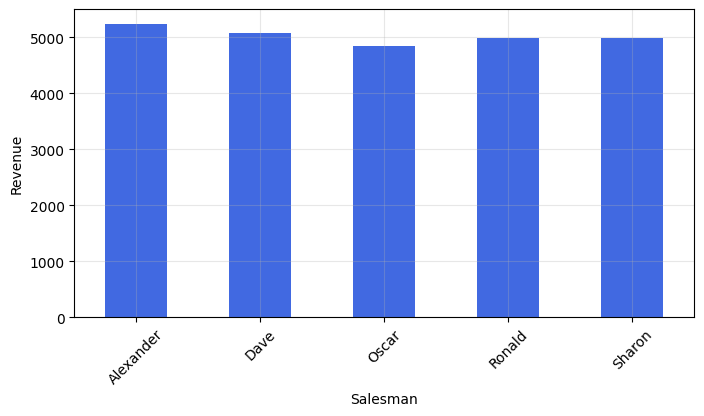

In [60]:
# An application: plot by subjects

sales_pivoted.mean().plot.bar(color = 'royalblue', figsize = (8, 4))
plt.grid(alpha = 0.3)
plt.xticks(rotation = 45)
plt.ylabel('Revenue');

### 12.2. `.melt`

* The melt method is the inverse of the pivot method.
* This method is ideal when we have multiple columns storing the same data point.
* Key parameters:
1. `id_vars =` accepts the column whose values will be repeated for every column. We can think of it as the columns to remain unchanged and will be repeated.
2. `value_vars` controls name of the value columns to be unpivoted.
3. `var_name` sets the name of the new column for the varying values (the former column names). By default it is set as 'variable'.
4. `value_name` sets the name of the values column (holding the values from the original DataFrame).

In [63]:
quarters

,Salesman,Q1,Q2,Q3,Q4
0,Boris,602908,233879,354479,32704
1,Piers,43790,514863,297151,544493
2,Tommy,392668,113579,430882,247231
3,Travis,834663,266785,749238,570524
4,Cindy,580935,411379,110390,651572
5,Rob,656644,70803,375948,321388
6,Mike,486141,600753,742716,404995
7,Stacy,479662,742806,770712,2501
8,Alexandra,992673,879183,37945,293710


* We can see that the column Q1, Q2, Q3, Q4 do not generally represent the exact meaning of the data.
* We can have a solution by changing the column names such as Rev_Q1, Rev_Q2, Rev_Q3, Rev_Q4.
* We can also use the `.melt` method here. Let's see what happens.

In [65]:
quaters_melted = (
    quarters
    .melt(
        id_vars = 'Salesman',   # think of this as the column to be retained
        var_name = 'Quarter',   # name for the column storing the original columns
        value_name = 'Revenue', # without this the name will be 'variable'
    )
)

quaters_melted

,Salesman,Quarter,Revenue
0,Boris,Q1,602908
1,Piers,Q1,43790
2,Tommy,Q1,392668
3,Travis,Q1,834663
4,Cindy,Q1,580935
5,Rob,Q1,656644
6,Mike,Q1,486141
7,Stacy,Q1,479662
8,Alexandra,Q1,992673
9,Boris,Q2,233879


* It looks messy but we can use MultiIndex to further re-format it.

In [67]:
# Example

quaters_melted.set_index(['Salesman', 'Quarter']).sort_index()

Revenue
Salesman  Quarter         
Alexandra Q1        992673
          Q2        879183
          Q3         37945
          Q4        293710
Boris     Q1        602908
          Q2        233879
          Q3        354479
          Q4         32704
Cindy     Q1        580935
          Q2        411379
          Q3        110390
          Q4        651572
Mike      Q1        486141
          Q2        600753
          Q3        742716
          Q4        404995
Piers     Q1         43790
          Q2        514863
          Q3        297151
          Q4        544493
Rob       Q1        656644
          Q2         70803
          Q3        375948
          Q4        321388
Stacy     Q1        479662
          Q2        742806
          Q3        770712
          Q4          2501
Tommy     Q1        392668
          Q2        113579
          Q3        430882
          Q4        247231
Travis    Q1        834663
          Q2        266785
          Q3        749238
          Q4        570524

### 12.3. `pivot_table`

* The `pivot_table` method operates similarly to the feature Pivot Table in Excel. It is a very strong method to summarize dataset.
* A pivot table is a table whose values are aggregation of groups of values from another table (a summary table).
* We can consider the `pivot_table` method as a replacement for `groupby` in many cases.
* Key parameters:
1. `values =` accepts the numeric column whose values will be aggregated.
2. `aggfunc =` declares the aggregation function (the default is mean/average).
3. `index =` sets the index labels of the pivot table. MultiIndexes are permitted.
4. `columns =` set the column labels of the pivot table. MultiIndexes are permmited.

In [70]:
foods

# We see that the structure of this DF is a good candidate for .groupby. Here we use .pivot_table as an alternative

,First Name,Gender,City,Frequency,Item,Spend
0,Wanda,Female,Stamford,Weekly,Burger,15.66
1,Eric,Male,Stamford,Daily,Chalupa,10.56
2,Charles,Male,New York,Never,Sushi,42.14
3,Anna,Female,Philadelphia,Once,Ice Cream,11.01
4,Deborah,Female,Philadelphia,Daily,Chalupa,23.49
...,...,...,...,...,...,...
995,Donna,Female,New York,Monthly,Sushi,83.53
996,Albert,Male,Philadelphia,Daily,Sushi,72.88
997,Jean,Female,Stamford,Weekly,Donut,5.85
998,Jessica,Female,New York,Daily,Chalupa,43.19


In [71]:
# Example 1

(
    foods
    .pivot_table(
        values = 'Spend', # containing numeric data
        index = 'Gender' # subjects to be grouped by
    )
)

,Spend
Gender,
Female,50.709629
Male,49.397623


* By default the values are applied with `aggfunc =  mean`. Hence, the values here are the mean Spend of Female and Male.

In [73]:
# Example 2

(
    foods
    .pivot_table(
        values = 'Spend',
        index =  'Gender',
        aggfunc =  'median',
    )
)

,Spend
Gender,
Female,50.110
Male,48.025


In [74]:
# Example 3: by Gender and Item
# Note that this will generate MultiIndex

(
    foods
    .pivot_table(
        values = 'Spend',
        index = ['Gender', 'Item'],
        aggfunc =  'mean',
    )
)

Spend
Gender Item                
Female Burger     49.930488
       Burrito    50.092000
       Chalupa    54.635000
       Donut      49.926316
       Ice Cream  49.788519
       Sushi      50.355699
Male   Burger     49.613919
       Burrito    48.344819
       Chalupa    49.186761
       Donut      43.649565
       Ice Cream  51.096000
       Sushi      55.614384

In [75]:
# Example 4: Now I want to see Spend by each City

(
    foods
    .pivot_table(
        values = 'Spend',
        index = ['Gender', 'Item'],
        aggfunc =  'max',
        columns = 'City'
    )
)

City              New York  Philadelphia  Stamford
Gender Item                                       
Female Burger        98.96         97.79     85.06
       Burrito       92.25         96.79     99.21
       Chalupa       98.43         99.29     98.78
       Donut         95.63         96.52     91.75
       Ice Cream     97.83         88.14     97.44
       Sushi         99.51         99.02     95.43
Male   Burger        90.32         99.68     97.20
       Burrito       98.04         93.27     95.07
       Chalupa       96.44         98.40     99.87
       Donut         86.70         93.12     99.26
       Ice Cream     97.65         99.24     99.17
       Sushi         93.85         97.12     98.48

In [76]:
# Example 5
(
    foods
    .pivot_table(
        values = 'Spend',
        index = 'Item',
        aggfunc =  'count',
        columns = ['Gender', 'City'] # order decides the index levels
    )
)

Gender      Female                           Male                      
City      New York Philadelphia Stamford New York Philadelphia Stamford
Item                                                                   
Burger          24           31       27       22           21       31
Burrito         23           28       34       25           30       28
Chalupa         19           32       25       25           23       23
Donut           31           30       34       30           33       29
Ice Cream       27           32       22       29           41       25
Sushi           31           30       32       27           28       18

* These organization faciliates the visualization (plot) considerably.

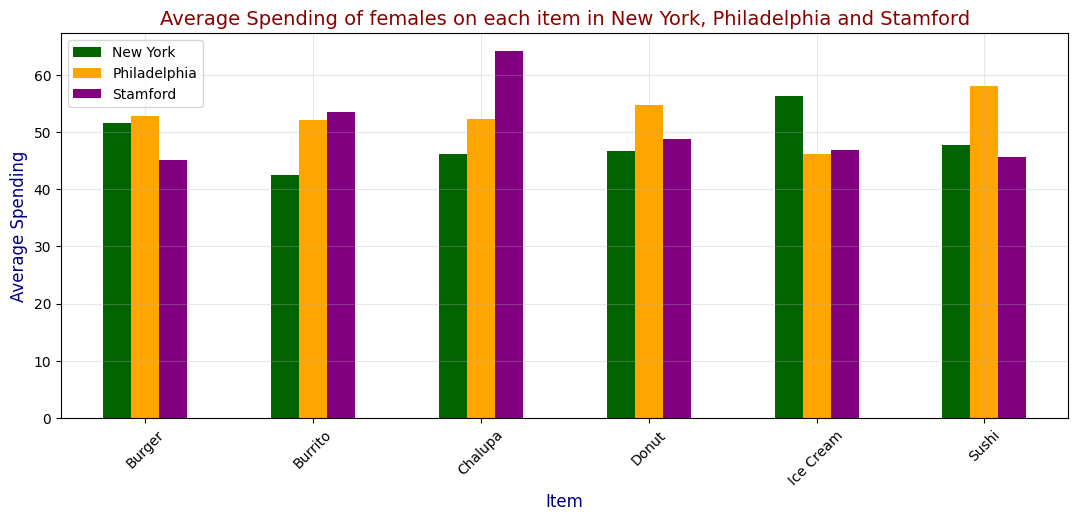

In [78]:
# Example

(
    foods
    .pivot_table(
        values = 'Spend',
        index = ['Gender', 'Item'],
        aggfunc =  'mean',
        columns = 'City'
    )
).loc['Female'].plot.bar(figsize = (13, 5), color = ['darkgreen', 'orange', 'purple'])

plt.grid(alpha = 0.3)
plt.xticks(rotation = 45)
plt.ylabel('Average Spending', fontsize = 12, color = 'navy')
plt.xlabel('Item', fontsize = 12, color = 'navy')
plt.title('Average Spending of females on each item in New York, Philadelphia and Stamford', fontsize = 14, color = 'darkred')
plt.legend(loc = 'best');

# This generate a bar chart to compared the mean 'Spend' of 'Female' for each 'Item' in each 'City'